In [1]:
import matplotlib
%matplotlib inline
from nilearn import datasets
from nilearn import plotting
import nibabel as nib

from neurolang import frontend as fe

destrieux_dataset = datasets.fetch_atlas_destrieux_2009()
destrieux_map = nib.load(destrieux_dataset['maps'])

/Users/dwasserm/anaconda/envs/new3.6/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/dwasserm/sources/NeuroLang/neurolang/expression_pattern_matching.py:54: UserWarning: Warning in class FirstOrderLogicSolver overwrites {'existential_predicate', 'universal_predicate'} from base GenericSolver[typing.Any]
  warn(warn_message)
/Users/dwasserm/anaconda/envs/new3.6/lib/python3.6/site-packages/numpy/lib/npyio.py:2278: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


In [2]:
destrieux_dataset['labels']

rec.array([(  0, b'Background'), (  1, b'L G_and_S_frontomargin'),
           (  2, b'L G_and_S_occipital_inf'),
           (  3, b'L G_and_S_paracentral'),
           (  4, b'L G_and_S_subcentral'),
           (  5, b'L G_and_S_transv_frontopol'),
           (  6, b'L G_and_S_cingul-Ant'),
           (  7, b'L G_and_S_cingul-Mid-Ant'),
           (  8, b'L G_and_S_cingul-Mid-Post'),
           (  9, b'L G_cingul-Post-dorsal'),
           ( 10, b'L G_cingul-Post-ventral'), ( 11, b'L G_cuneus'),
           ( 12, b'L G_front_inf-Opercular'),
           ( 13, b'L G_front_inf-Orbital'),
           ( 14, b'L G_front_inf-Triangul'), ( 15, b'L G_front_middle'),
           ( 16, b'L G_front_sup'), ( 17, b'L G_Ins_lg_and_S_cent_ins'),
           ( 18, b'L G_insular_short'), ( 19, b'L G_occipital_middle'),
           ( 20, b'L G_occipital_sup'), ( 21, b'L G_oc-temp_lat-fusifor'),
           ( 22, b'L G_oc-temp_med-Lingual'),
           ( 23, b'L G_oc-temp_med-Parahip'), ( 24, b'L G_orbital'),
  

In [6]:
nl = fe.RegionFrontend()
for label_number, name in destrieux_dataset['labels']:
    name = name.decode()
    if not name.startswith('L ') or ('S_' not in name and 'Lat_Fis' not in name and 'Pole' not in name):
        continue

    # Create a region object
    region = nl.create_region(destrieux_map, label=label_number)

    # Fine tune the symbol name
    name = 'L_' + name[2:].replace('-', '_')
    nl.add_region(region, result_symbol_name=name)

# Assumptions

- we do not include sulci which are included in the gyrus, for example G_and_S_cingul..., or non-neocortical sulci, e.g. circular sulci of the insula
- sulci which have already been found are excluded from the search
- primary sulci branches are not included in the search

# Suggestions

Destrieux testing:
- Include the poles (_Pole_occipital & _Pole_temporal)

For Neurolang later:
- Separate searches by surface: lateral, medial, ventral

# Finding intermediate primus of Jensen

Found with subparietal sulcus

Initially, we were looking for intra parietal sulcus. We got intermediate primus of Jensen instead.
Antonia's hypothesis for why it didn't return the intra parietal sulcus:
Destrieux combines intra parietal sulcus AND transverse parietal sulci, making the region bigger which breaks the anatomical positional relationship between this region and the regions we are using for finding it.

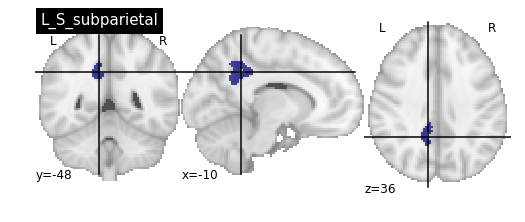

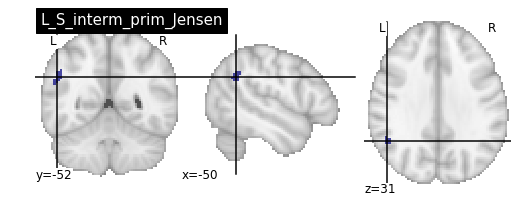

In [4]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_S_central) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_Lat_Fis_post) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_parieto_occipital)
    )
)
res = q.do()
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)

# Temporal lobe

## Lateral surface


## Looking for the superior and inferior temporal sulci

not specific enough to localise these two


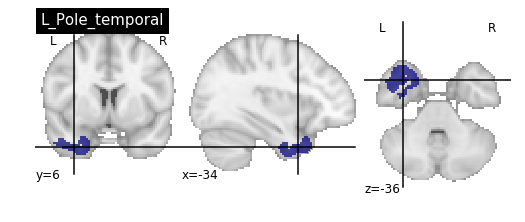

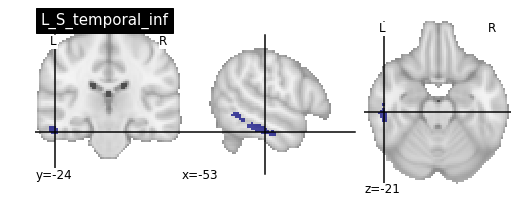

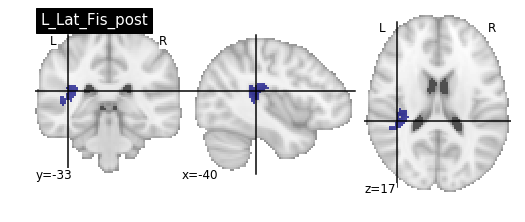

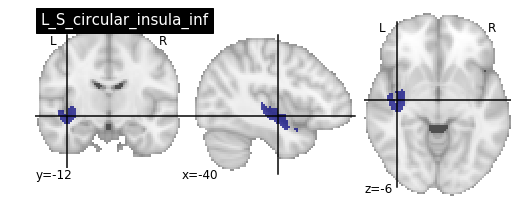

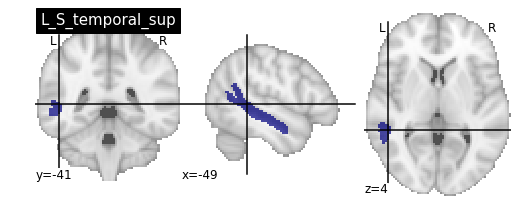

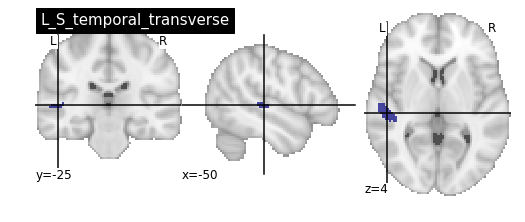

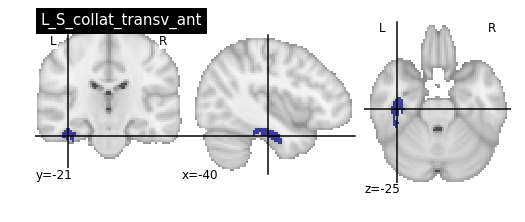

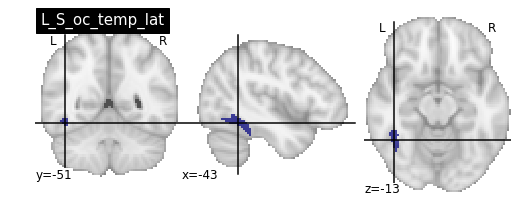

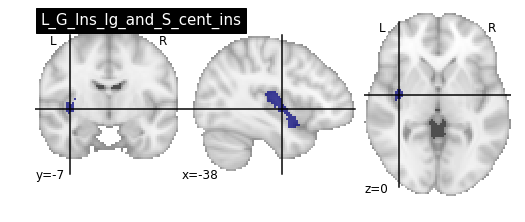

In [5]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_inferior_of(x, nl.symbols.L_S_parieto_occipital) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_calcarine) &
#         nl.symbols.anatomical_superior_of(x, nl.symbols.L_S_collat_transv_ant) &
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_Lat_Fis_ant_Vertical)
    )
)
res = q.do()
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)

## Superior temporal sulcus

Unsuccessful

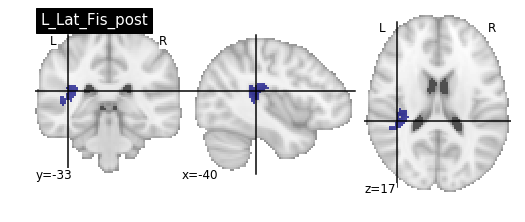

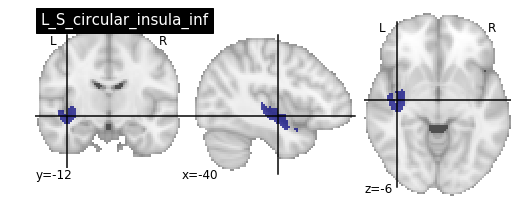

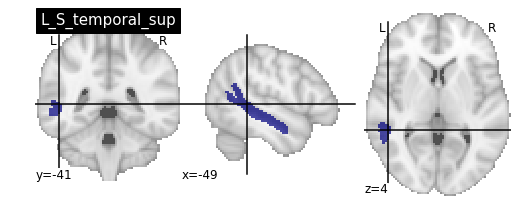

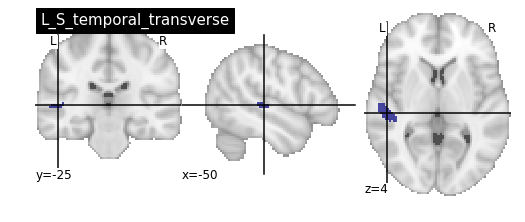

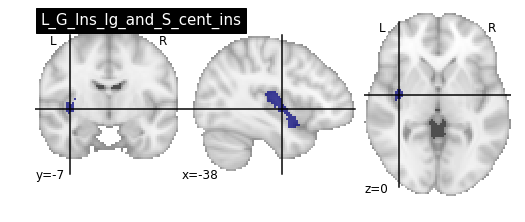

In [6]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_inferior_of(x, nl.symbols.L_S_central) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_parieto_occipital) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_S_collat_transv_ant) &
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_Pole_temporal)
    )
)
res = q.do()
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)

## Inferior temporal sulcus

Unsuccessful!

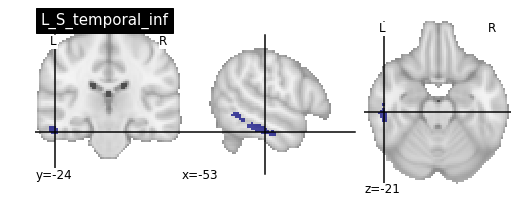

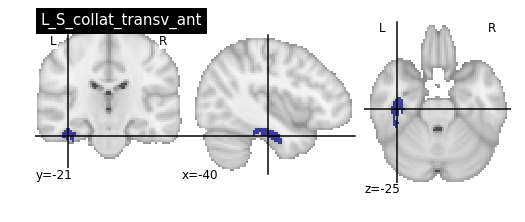

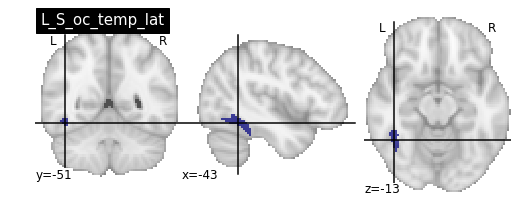

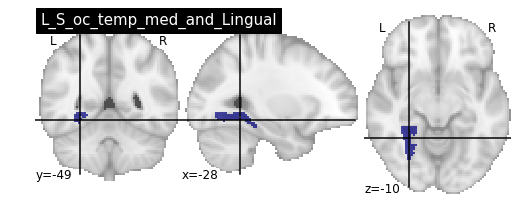

In [7]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_inferior_of(x, nl.symbols.L_Lat_Fis_ant_Vertical) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_parieto_occipital) &
#         nl.symbols.anatomical_superior_of(x, nl.symbols.L_Pole_temporal) &
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_Pole_temporal)
    )
)
res = q.do()
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)

## Temporal Transverse sulcus

Success.

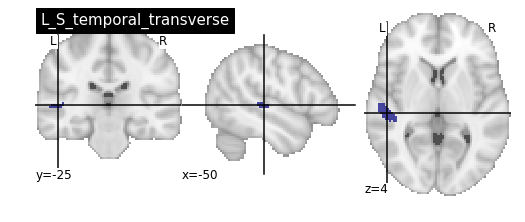

In [8]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_inferior_of(x, nl.symbols.L_Lat_Fis_post) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_parieto_occipital) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_S_collat_transv_ant) &
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_Pole_temporal)
    )
)
res = q.do()
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)

## Lateral Occipitotemporal sulcus

Success. (2 ways)

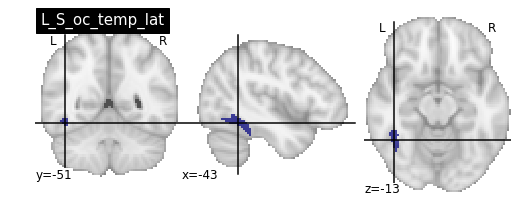

In [9]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_inferior_of(x, nl.symbols.L_Lat_Fis_ant_Horizont) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_calcarine) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_Pole_temporal) &
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_Lat_Fis_ant_Horizont)
    )
)
res = q.do()
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)

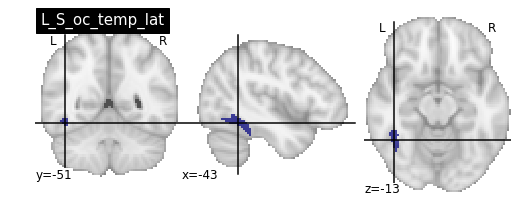

In [10]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_inferior_of(x, nl.symbols.L_Lat_Fis_ant_Horizont) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_calcarine) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_Pole_temporal) &
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_S_orbital_H_Shaped)
    )
)
res = q.do()
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)

## Collateral sulcus: anterior part

Success

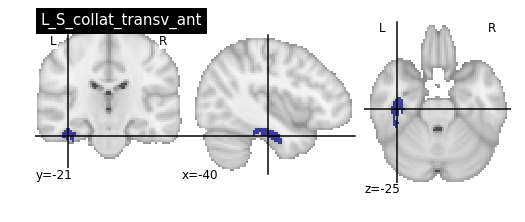

In [11]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_Pole_temporal) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_Lat_Fis_post) &
        nl.symbols.anatomical_inferior_of(x, nl.symbols.L_Lat_Fis_ant_Horizont)
    )
)
res = q.do()
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)

## Temporal pole

Success.

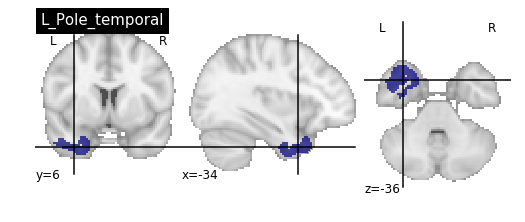

In [12]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_temporal_sup) &
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_S_orbital_H_Shaped) &
        nl.symbols.anatomical_inferior_of(x, nl.symbols.L_Lat_Fis_ant_Horizont)
    )
)
res = q.do()
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)

## Lateral orbital sulcus

Unsuccessful. Needs the lateral/medial comparison

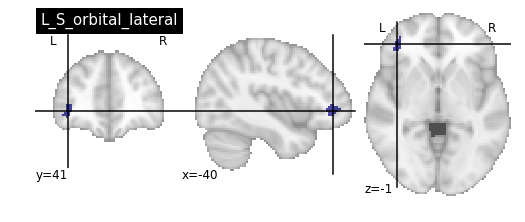

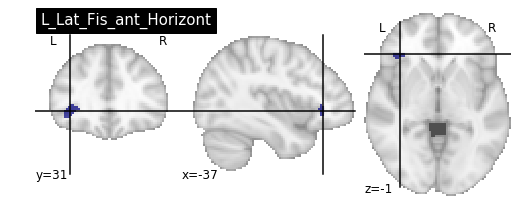

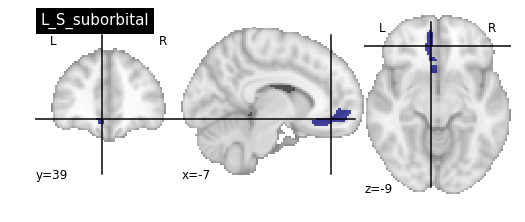

In [13]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_precentral_inf_part) &
        nl.symbols.anatomical_inferior_of(x, nl.symbols.L_S_front_middle) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_S_orbital_H_Shaped)
    )
)
res = q.do()
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)

# Occipital lobe sulci

- posterior collateral sulcus
- occipitotemporal sulcus
- lingual sulcus
- anterior occipital sulcus
- middle and lunatus sulci
- inferior occipital sulcus and gyrus

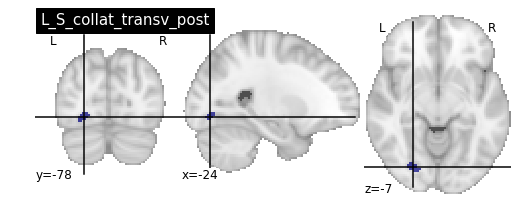

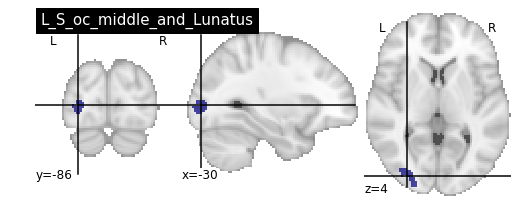

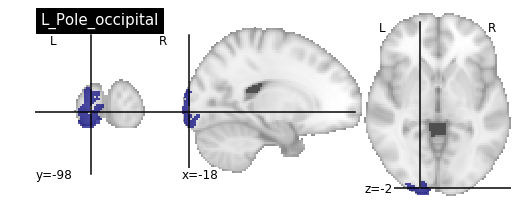

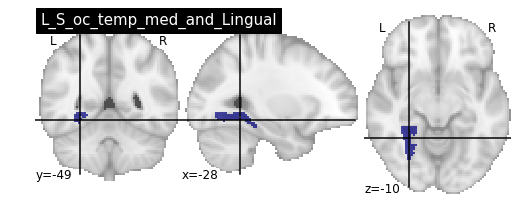

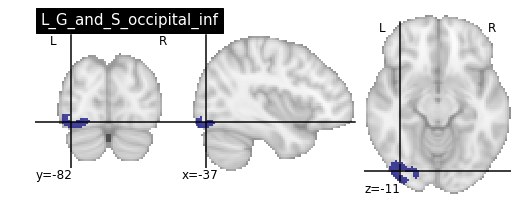

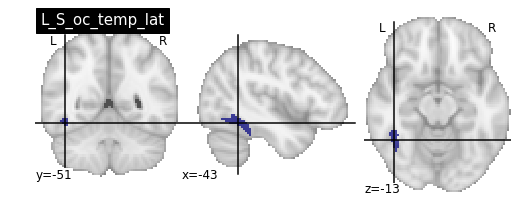

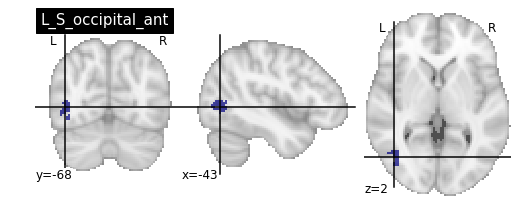

In [14]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_Lat_Fis_post) &
        nl.symbols.anatomical_inferior_of(x, nl.symbols.L_S_parieto_occipital)
    )
)
res = q.do()
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)

## Ventral surface

## Collateral sulcus (posterior)

Found


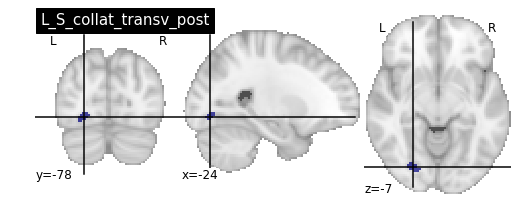

In [15]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_S_temporal_sup) &
        nl.symbols.anatomical_inferior_of(x, nl.symbols.L_S_calcarine) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_Pole_occipital)
    )
)
res = q.do()
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)

## Medial occipitotemporal and lingual sulci

Success.


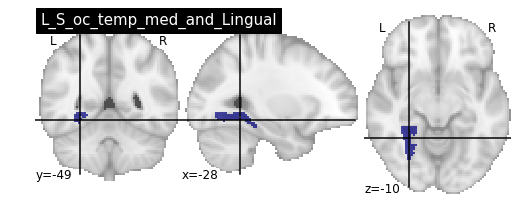

In [16]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_S_temporal_inf) &
        nl.symbols.anatomical_inferior_of(x, nl.symbols.L_S_interm_prim_Jensen) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_oc_sup_and_transversal)
    )
)
res = q.do()
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)

## Occipital anterior sulcus

Success.


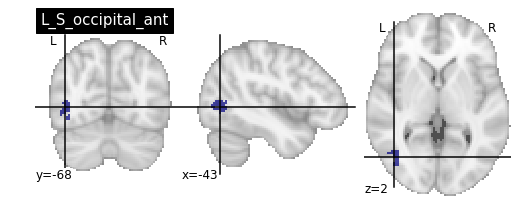

In [17]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_Lat_Fis_post) &
        nl.symbols.anatomical_inferior_of(x, nl.symbols.L_S_interm_prim_Jensen) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_Pole_occipital) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_S_collat_transv_post)
    )
)
res = q.do()
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)

## Occipital superior and transversal sulci

Found!


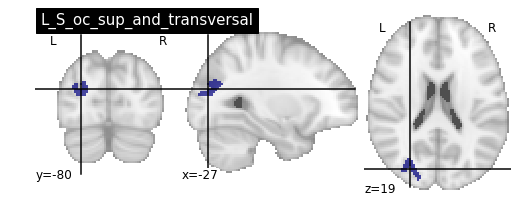

In [18]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_Lat_Fis_post) &
        nl.symbols.anatomical_inferior_of(x, nl.symbols.L_S_subparietal) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_S_calcarine)
    )
)
res = q.do()
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)

## Occipital middle and Lunate sulcus

Success.

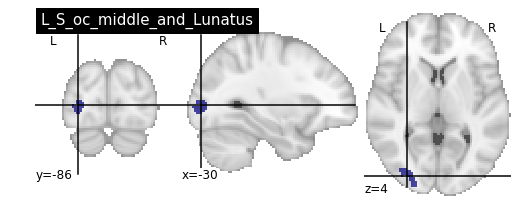

In [19]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_S_occipital_ant) &
        nl.symbols.anatomical_inferior_of(x, nl.symbols.L_S_parieto_occipital) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_S_collat_transv_post)
    )
)
res = q.do()
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)

## Inferior occipital gyrus and sulcus

(_G_and_S_occipital_inf : The inferior occipital sulcus is grouped with the inferior occipital gyrus)

Success.

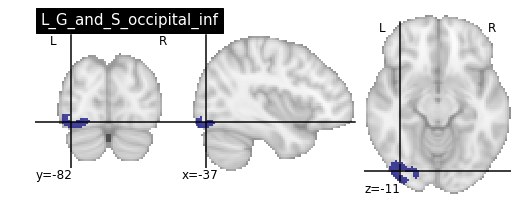

In [20]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_S_oc_sup_and_transversal) &
        nl.symbols.anatomical_inferior_of(x, nl.symbols.L_S_parieto_occipital)
    )
)
res = q.do()
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)

## Occipital Pole

Success.

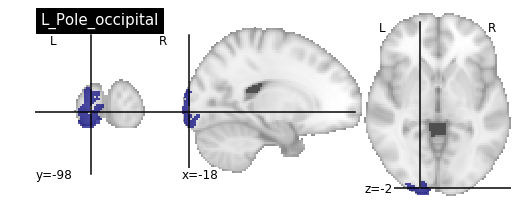

In [21]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_S_collat_transv_post) &
        nl.symbols.anatomical_inferior_of(x, nl.symbols.L_S_parieto_occipital)
    )
)
res = q.do()
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)

# Parietal lobe sulci

- Postcentral sulcus
- Intraparietal sulcus
- Intermediate primus of Jensen
- Subparietal sulcus
- Paracentral sulcus (with gyrus)
- Marginal sulcus

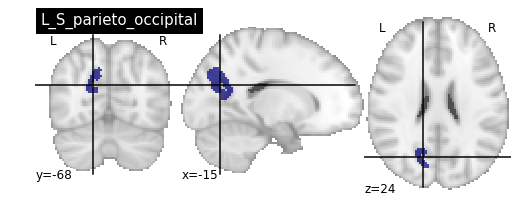

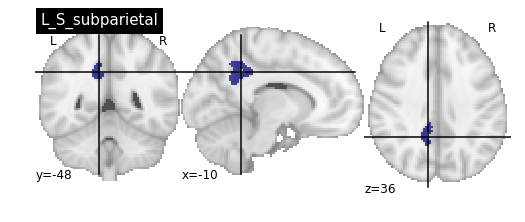

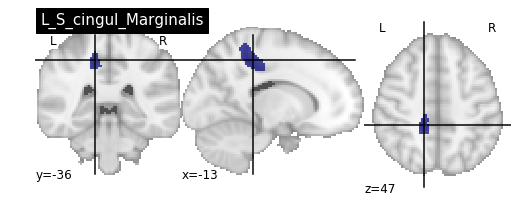

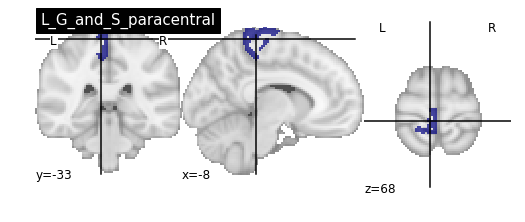

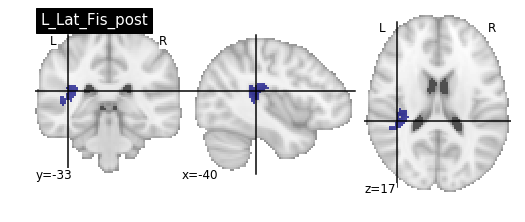

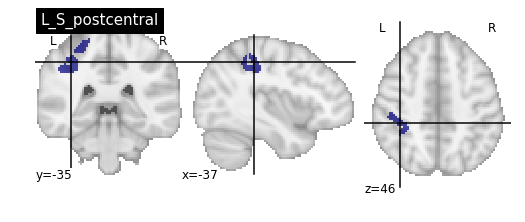

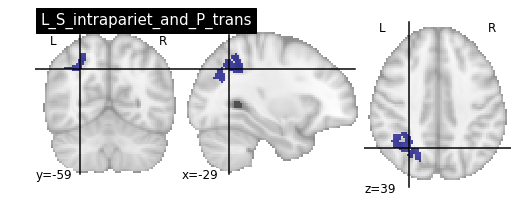

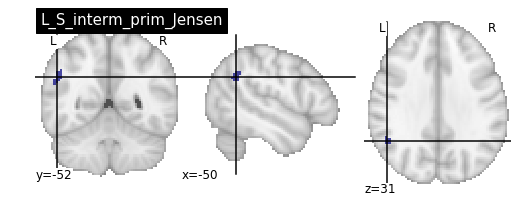

In [22]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_S_precentral_sup_part) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_Pole_occipital)
    )
)
res = q.do()
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)

## Localising the Intermediate primus of Jensen from primary sulci only



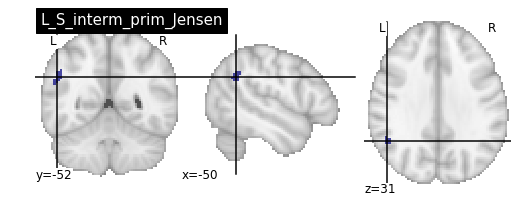

In [23]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_S_central) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_S_pericallosal) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_parieto_occipital)
    )
)
res = q.do()
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)

## Intraparietal sulcus

Can only be found with the Intermediate primus of Jensen (they are almost overlapping)

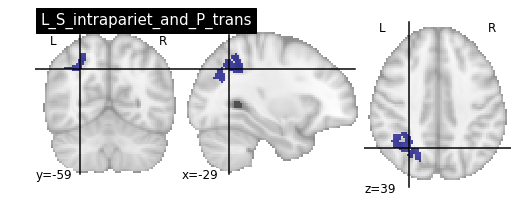

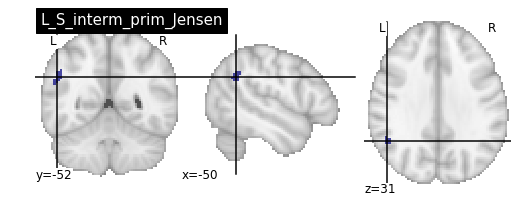

In [24]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_S_pericallosal) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_S_calcarine) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_Pole_occipital)
    )
)
res = q.do()
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)

## Medial parietal sulci

- Paracentral sulcus (and gyrus)
- Marginal sulcus
- Subparietal sulcus

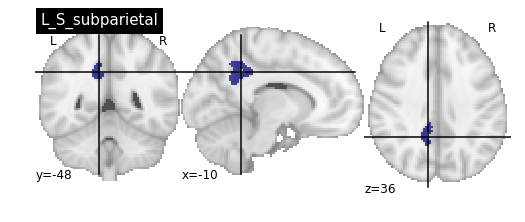

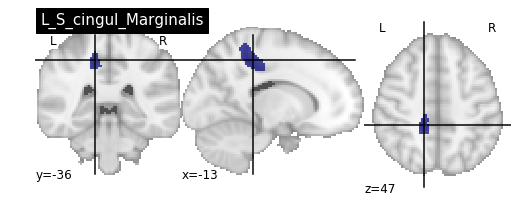

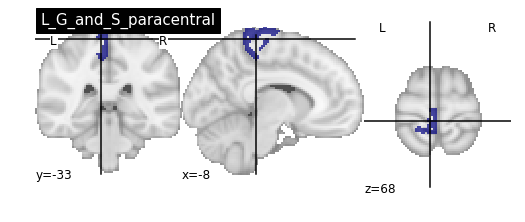

In [25]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_S_precentral_sup_part) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_S_interm_prim_Jensen) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_parieto_occipital)
    )
)
res = q.do()
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)

## Subparietal sulcus

Success. (6 ways)

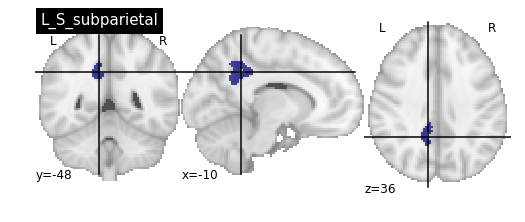

In [26]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_Lat_Fis_post) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_calcarine) &
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_S_central)
    )
)
res = q.do()
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)

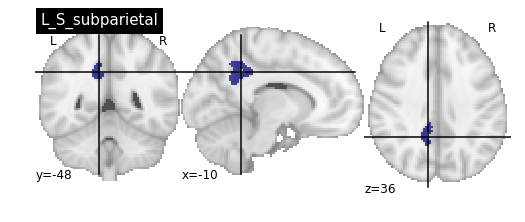

In [27]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_S_calcarine) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_calcarine) &
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_S_central)
    )
)
res = q.do()
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)

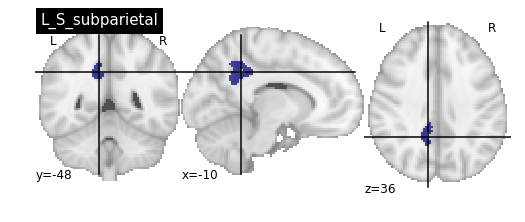

In [28]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_S_central) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_intrapariet_and_P_trans) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_Lat_Fis_post)
    )
)
res = q.do()
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)

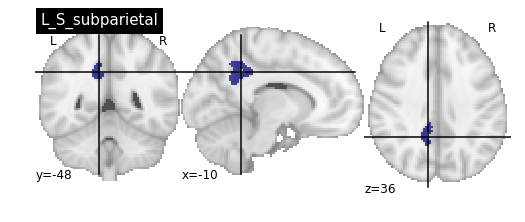

In [29]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_S_central) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_intrapariet_and_P_trans) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_Lat_Fis_ant_Horizont)
    )
)
res = q.do()
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)

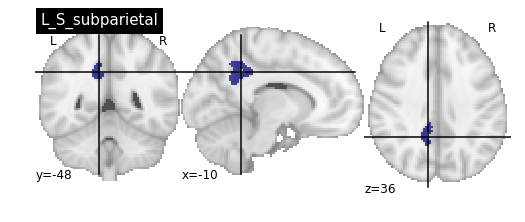

In [30]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_S_temporal_sup) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_calcarine) &
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_S_central)
    )
)
res = q.do()
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)

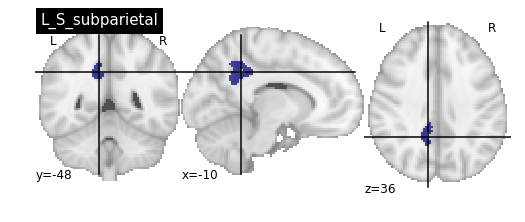

In [31]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_S_postcentral) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_S_interm_prim_Jensen)
    )
)
res = q.do()
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)

## Marginal sulcus

Position indistiguishable from the postcentral sulcus, because lack of lateral/medial discrepancy, and from the paracentral gyrus and sulcus.

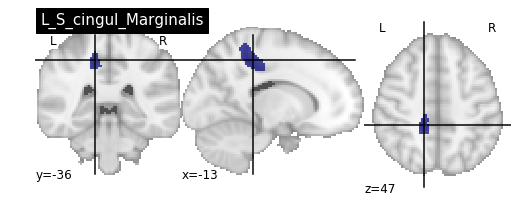

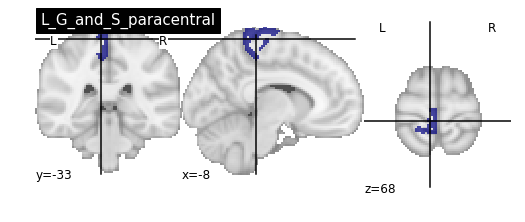

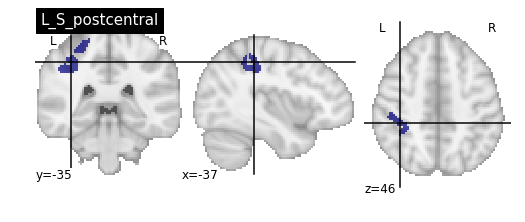

In [32]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_S_precentral_sup_part) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_S_parieto_occipital)
    )
)
res = q.do()
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)

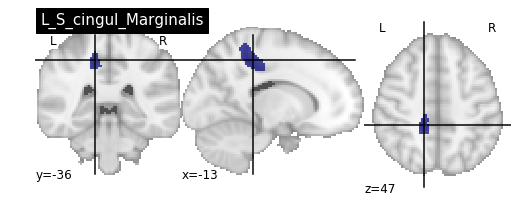

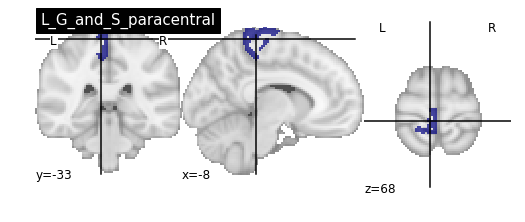

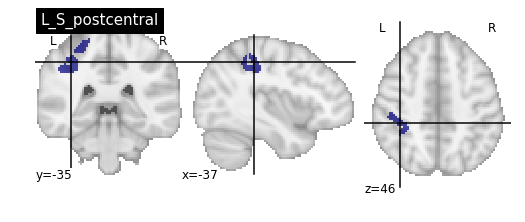

In [33]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_G_and_S_cingul_Mid_Post) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_interm_prim_Jensen) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_G_and_S_cingul_Mid_Ant)
    )
)
res = q.do()
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)

## Postcentral sulcus

Success, with paracentral sulcus and gyrus (unavoidable since gyrus is included)

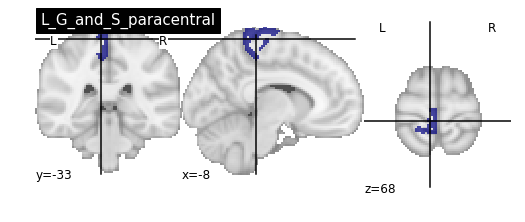

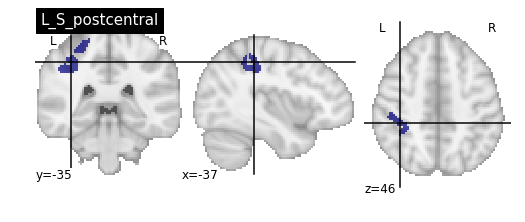

In [34]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_S_precentral_sup_part) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_S_subparietal) 
    )
)
res = q.do()
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)

# Frontal lobe sulci

## Ventral surface

- circular sulcus of the insula (anterior)
- suborbital sulcus
- olfactory sulcus
- H-shaped orbital sulcus
- lateral orbital sulcus

--> We cannot narrow these down each specifically because we cannot differentiate between lateral/medial sulci yet


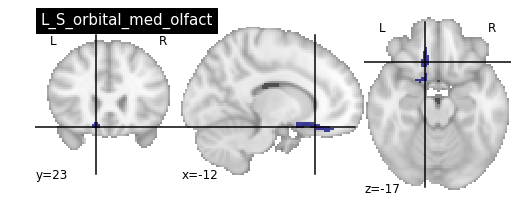

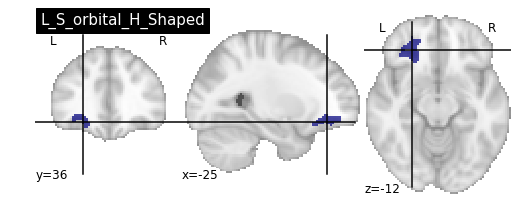

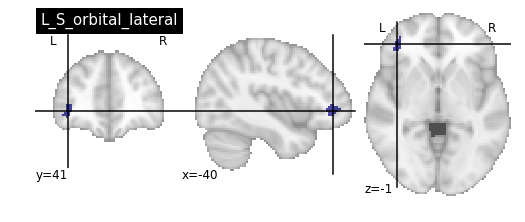

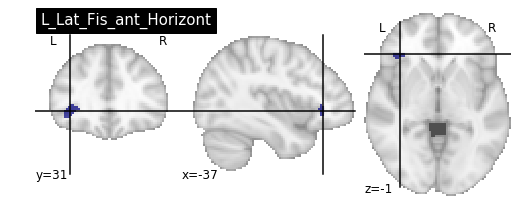

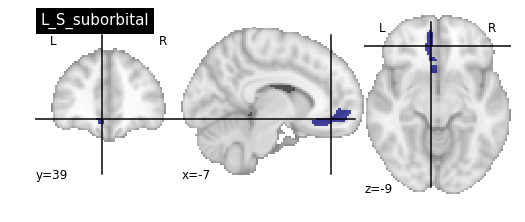

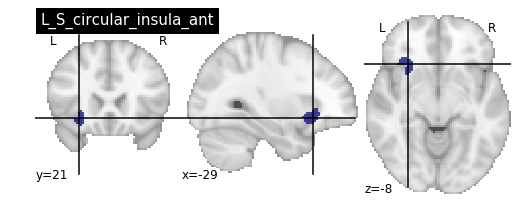

In [35]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_precentral_inf_part) &
        nl.symbols.anatomical_inferior_of(x, nl.symbols.L_S_front_middle)
    )
)
res = q.do()
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)

## Orbital H-shaped sulcus and Olfactory sulcus



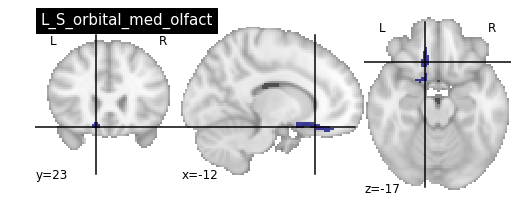

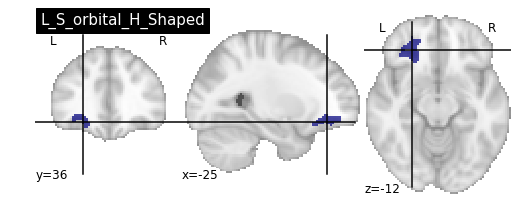

In [36]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_Pole_temporal) &
        nl.symbols.anatomical_inferior_of(x, nl.symbols.L_S_suborbital)
    )
)
res = q.do()
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)

## Lateral surface

- Precentral sulcus, superior and inferior parts
- Superior frontal sulcus
- Middle frontal sulcus
- Inferior frontal sulcus



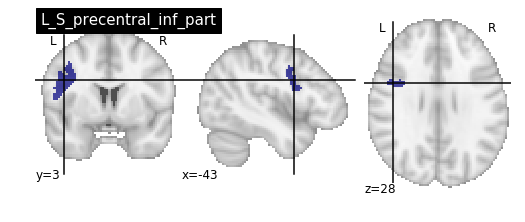

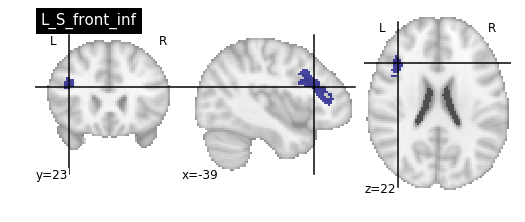

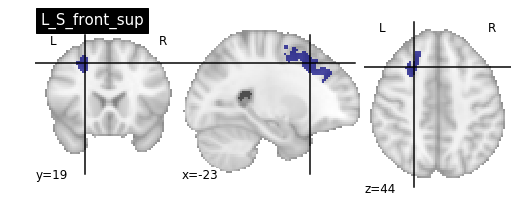

In [37]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_central) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_S_pericallosal)
    )
)
res = q.do()
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)

## Looking for precentral superior and inferior parts

Assuming these rules:

- we do not include sulci which are included in the gyrus, for example G_and_S_cingul..., or non-neocortical sulci, e.g. circular sulci of the insula
- sulci which have already been found are excluded from the search
- primary sulci branches are not included in the search

we successfully localised the inferior and superior parts of the precentral sulcus.

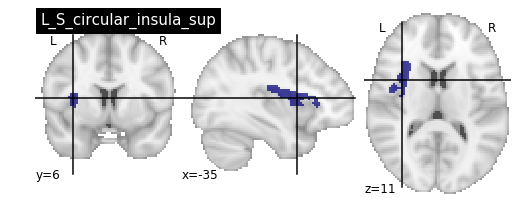

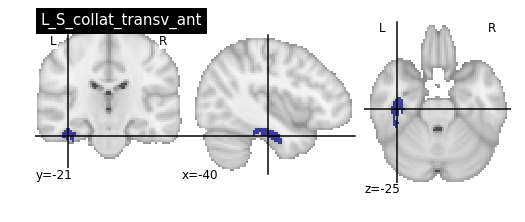

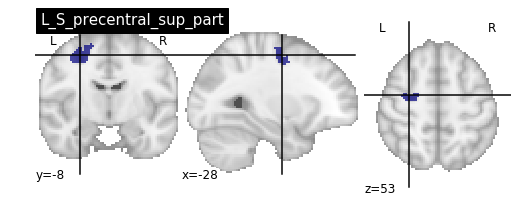

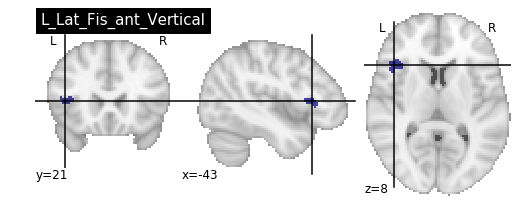

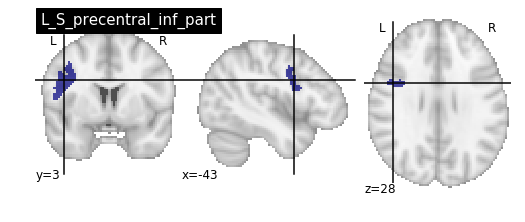

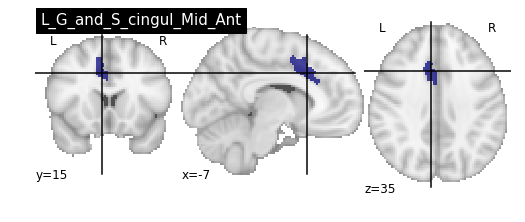

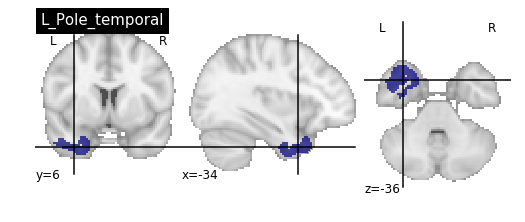

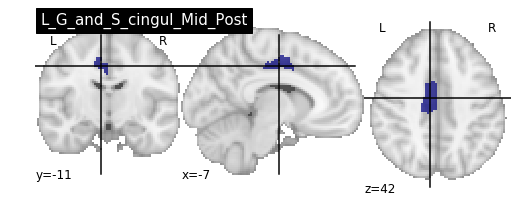

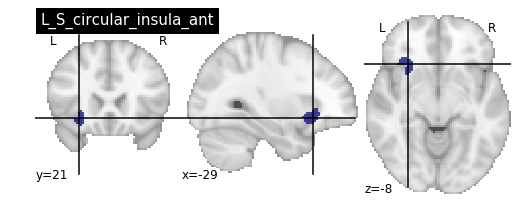

In [38]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_Lat_Fis_ant_Horizont) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_Lat_Fis_post)
    )
)
res = q.do()
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)

## Inferior frontal sulcus

found

(excluding...primary sulci branches and already found sulci)



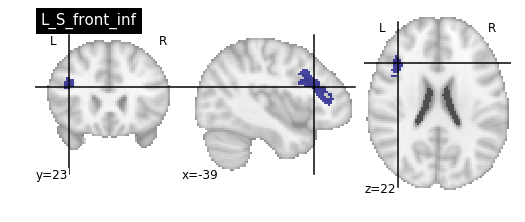

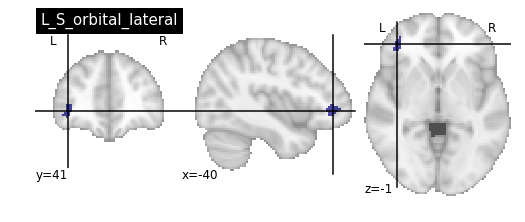

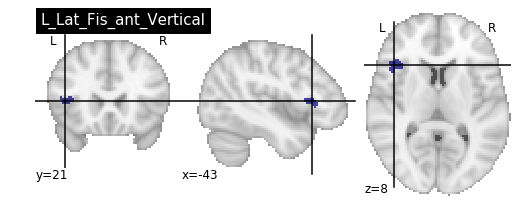

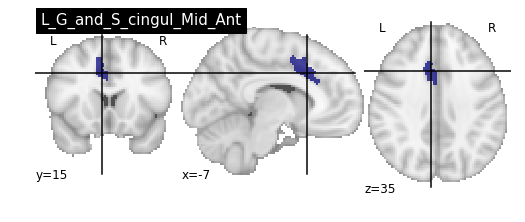

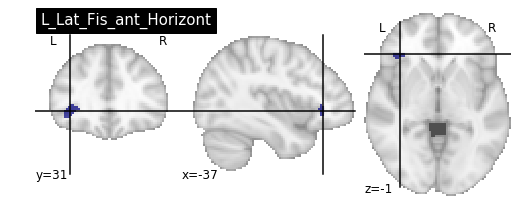

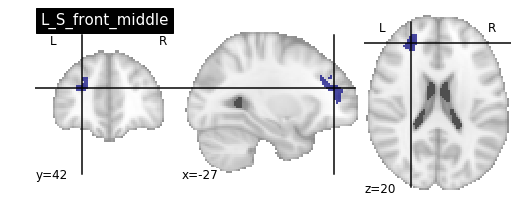

In [39]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_precentral_sup_part) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_S_suborbital)
    )
)
res = q.do()
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)

## Looking for middle frontal sulcus

Success.


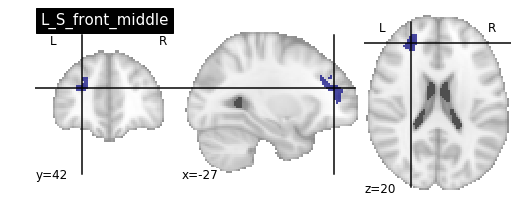

In [40]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_precentral_sup_part) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_Lat_Fis_ant_Vertical) &
        nl.symbols.anatomical_inferior_of(x, nl.symbols.L_G_and_S_cingul_Mid_Ant)
    )
)
res = q.do()
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)

## Looking for superior frontal sulcus

Found.

Cannot be distinguished from the G_and_S_cingul_Mid_Ant because we cannot yet distinguish lateral and medial yet.

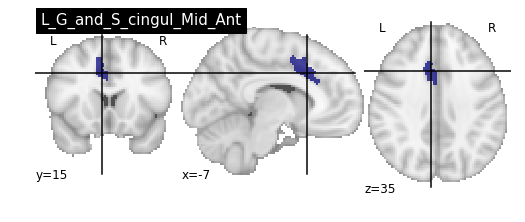

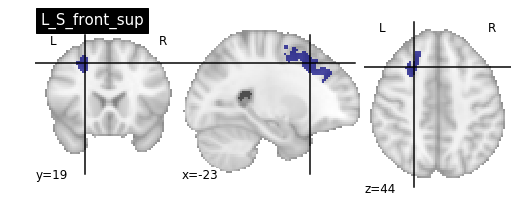

In [41]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_central) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_S_precentral_inf_part)
    )
)
res = q.do()
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)

## Looking for suborbital sulcus

Success.

/Users/dwasserm/sources/NeuroLang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))
/Users/dwasserm/anaconda/envs/new3.6/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


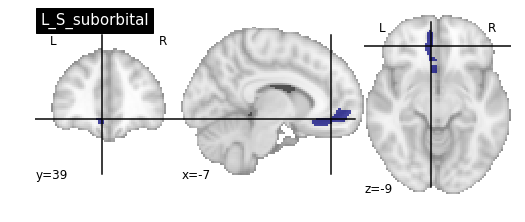

In [8]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_inferior_of(x, nl.symbols.L_Lat_Fis_ant_Horizont) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_S_orbital_H_Shaped) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_central)
    )
)
res = q.do()
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)

# Example of a plane

/Users/dwasserm/anaconda/envs/new3.6/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


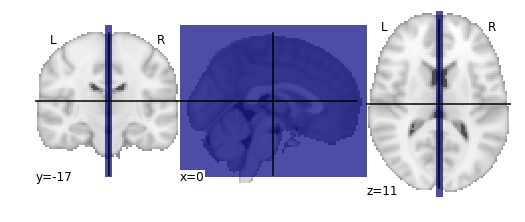

In [10]:
from neurolang import regions
oxplane = regions.PlanarVolume((0, 0, 0), (1, 0, 0))
ox_plane_vbr = oxplane.to_explicit_vbr(destrieux_map.affine, destrieux_map.shape)
nl.add_region(ox_plane_vbr, result_symbol_name='plane_medial')
plotting.plot_roi(ox_plane_vbr.spatial_image())

/Users/dwasserm/sources/NeuroLang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))
/Users/dwasserm/anaconda/envs/new3.6/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


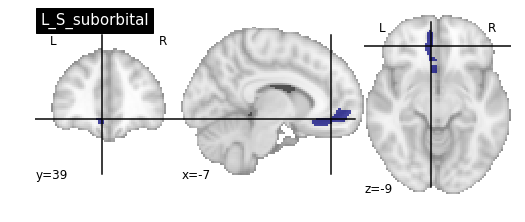

In [11]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_inferior_of(x, nl.symbols.L_Lat_Fis_ant_Horizont) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_S_orbital_H_Shaped) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_central) &
        nl.symbols.left_of(x, nl.symbols.plane_medial)
    )
)
res = q.do()
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)

In [ ]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_inferior_of(x, nl.symbols.L_Lat_Fis_ant_Horizont) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_S_orbital_H_Shaped) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_central) &
        nl.symbols.right_of(x, nl.symbols.plane_medial)
    )
)
res = q.do()
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)